In [20]:
from sequence_pairs import make_cgr
from cgr_model import predict, get_param_set
from matplotlib import pyplot as plt
import numpy as np
from glob import glob
import tensorflow as tf

In [21]:
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
# put sequences in here to get a prediction of whether the proteins they code for will interact:
sequence_1='ATGGGTGAGAAAGATATTCCAAGGAACTTGAAGGAAGAAGAAGAAGAAGAAGAAGAAAACCAAAGTGAAGAAACCAAAAGTTTGATCTCTTCACTTCCTTCAGACATAGATTGCTCAGGGACCAAGTTGTACAAGTACCAAGGATGTTGGTACGACAAAGATATTCTCCAAGCAATCCTCAATTTCAACAAAAACTTTCAGCCACAAGAAACGGATATAATTGTTGCTTCTTTCCCCAAATCGGGTACGACTTGGCTCAAGGCACTCACATTCGCACTCGCGCAAAGATCAAAACACACTTCAGACAATCATCCTCTGCTAACTCATAATCCTCATGAGCTAGTGCCGTACCTCGAGCTCGATCTTTATCTCAAAAGCTCGAAACCGGATTTGACCAAGTTGCCATCATCATCTCCGAGATTGTTCTCAACCCACATGTCCTTTGATGCGCTTAAAGTACCGTTGAAAGAGTCTCCTTGCAAGATCGTGTACGTGTGCAGGAACGTGAAAGACGTATTGGTATCACTTTGGTGTTTCGAAAACTCCATGAGTGGAGAAAACAATTTAAGTCTCGAGGCTTTGTTCGAGTCTTTATGTAGCGGAGTTAACTTATGCGGTCCCTTATGGGAAAATGTGTTAGGCTATTGGAGAGGAAGCTTGGAAGATCCTAAGCATGTGCTTTTCTTGAGGTACGAGGAGTTGAAGACGGAGCCTCGTGTGCAAATCAAGAGACTTGCAGAGTTCTTAGATTGTCCATTCACAAAGGAAGAAGAAGATAGTGGAGGTGTAGACAAGATCTTGGAACTTTGTTCTCTAAGAAACCTTAGCGGTTTGGAGATCAACAAAACAGGAAGCTTGTCGGAAGGAGTAAGTTTCAAGAGTTTTTTCCGTAAAGGGGAAGTTGGTGATTGGAAGAGTTATATGACTCCTGAAATGGAAAACAAAATCGACATGATTGTTGAGGAGAAACTTCAAGGCTCTGGTTTGAAATTGTAG'
sequence_2='ATGGCGTCAGATCAGAGCACGAATCCACCGATCATGGAGGCAAAGACAAGACATCCTCTTCACCAGATCGCAGATACACCAACACACAAGCTTCTCCTGAAACAATGGTTAAAAGAAGAAGAGCTAATTCTAAGCCGTGTCTCTCACAAAGAATCTCAGATCGATTCTGTTCGAAGAGAAATCACTCAGCTCTACATCTTCTTCTTTCTCTTCCACTCCATTTCTCTGCTACTTCTCTTCCACGCTTCTTCATCCTCATCTTCCTCTGCTTCTTCCAGTGCTTGTAAAAGATCATGGATCCCTTCACTCTGCGCTCTGCTATCTTCCTTGGGGATCATTTGGGCGGTACGGTACAAATCTGAAGTGGAATCGCATCTTGAGAAGTTGTTGGAGAGGGAGAAAGAAGATGCGAAGCTGTTGCGTAAATGTGTTGAAGAGTTGAAGAAGAAAGGTATCGAATTTGATTTGCTTAAGGAAGTGGATGCGCTTCGTAGAGCCAAGAGTTTAAGAGTTGAGTCGAAGCCTGTGAAGAAATGGTCTGCTAGGGATTTTGTGACGCTCTTCTTCTTCTCTGTTTCGTGTTTGGTTCTTGCCATGATTAGACTCATTCTCTGCGATTGA'

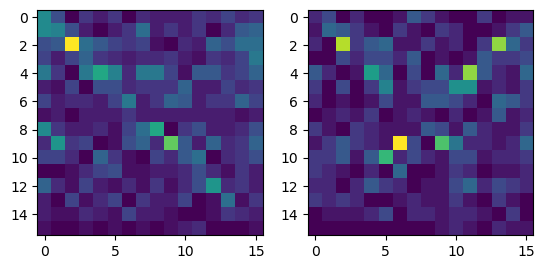

In [3]:
# build CGR attractors
cgr_1=make_cgr(sequence_1, 4, True)
cgr_2=make_cgr(sequence_2, 4, True)
plt.subplot(1,2,1)
plt.imshow(cgr_1)
plt.subplot(1,2,2)
plt.imshow(cgr_2)
plt.show()

Get a prediction using one trained model:

In [8]:
seed_i=881
params=get_param_set(seed_i)
params['k']=4
prediction = predict(params, 
        seed_i, 
        0, 
        f'data/0000_model_checkpoints/AtGrand_4mers_{seed_i}', 
        cgr_1, cgr_2)
if prediction.item() > 0.5:
    print(f'Predicted: PPI ({prediction.item()})')
else:
    print(f'Predicted: No PPI ({prediction.item()})')

tf.Tensor(0.01, shape=(), dtype=float64) 0.01 0.0001
1/1 [==============================] - 0s 101ms/step
Predicted: PPI (0.9570114612579346)


Get a prediction using an ensemble of trained models

In [ ]:
top_10_4mer_models=[130,212,385,481,670,692,777,856,869,881]
votes=0
for seed_i in top_10_4mer_models:
    params=get_param_set(seed_i)
    params['k']=4
    prediction = predict(params, 
            seed_i, 
            0, 
            f'data/0000_model_checkpoints/AtGrand_4mers_{seed_i}', 
            cgr_1, cgr_2)
    print(seed_i, prediction)
    if prediction > 0.5:
        votes+=1
if votes > np.floor(len(index_list)/2):
    print(f'Predicted: PPI ({votes} votes out of {len(top_10_4mer_models)})')
else:
    print(f'Predicted: No PPI ({votes} votes out of {len(top_10_4mer_models)})')